In [34]:
from __future__ import division

import requests
from bs4 import BeautifulSoup
from selenium import webdriver


import pandas as pd
import numpy as np

from IPython.core.display import HTML, Image

# Scrape a webpage

Here's a link to the Box Office Mojo page for Jurrasic Park. See if you can scrape the following information:
- Title
- Domestic Total Gross
- Distributor
- MPAA rating

In [35]:
url = 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm'

In [36]:
response = requests.get(url, 'lxml')
page = response.text
soup = BeautifulSoup(page, "lxml")

In [37]:
print soup.prettify()

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="Content-type"/>
  <title>
   Jurassic Park (1993) - Box Office Mojo
  </title>
  <style type="text/css">
   table.chart-wide { width: 100%; }
  </style>
  <meta content="jurassic park, movie, film, box office, result, records, charts, revenue, opening weekend, gross, worldwide, overseas, foreign, news, reviews, articles, stories, story, analysis, revenue, release date, mpaa rating, genre, running time, length, budget, production budget, distributor, studio, universal, theatrical summary, theatrical, showtimes, tickets, show times, theaters, playing, daily box office results, weekend box office results, weekly box office, weekly box office, release summary, international box office summary, worldwide box office summary, similar movies, image gallery, images, pictures, photos, box office mojo" name="keywords"

In [38]:
title_string = soup.find('title').text
title = str(title_string.split('(')[0].strip())
title

'Jurassic Park'

In [39]:
# Regular expressions (aka RegEx or re) matches patterns in your strings
# Use it to find text that is very similar to what you wrote
import re

In [40]:
item = soup.find(text=re.compile("Distributor"))

In [41]:
item

u'Distributor: '

In [42]:
item.findNextSibling()

<b><a href="/studio/chart/?studio=universal.htm">Universal</a></b>

In [43]:
def get_soup_from_url(url):
    '''Returns Beautiful Soup for a given webpage'''
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page)
    
    return soup

In [44]:
def get_movie_info(url):
    '''Takes in a movie's URL and scrapes that webpage using Beautiful Soup
    
    Returns a list of that movie's Title, Gross, Rating and Distributor
    
    
    >> url = 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm'
    >> get_movie_info(url)
    ['Jurassic Park', '$357,067,947', 'PG-13', 'Universal']
    
    
    '''
    soup = get_soup_from_url(url)
    
    results = []
    
    title_string = soup.find('title').text
    title = str(title_string.split('(')[0].strip())
    
    results.append(title)
    
    categories = ['Domestic Total Gross', 'MPAA', 'Distributor']
    
    for c in categories:
        item = soup.find(text=re.compile(c))
        
        next_item = item.findNextSibling()
        
        parsed_item = next_item.text.encode('ascii') #This conversion from unicode to ascii lets Python 2 read the strings 
        
        results.append(parsed_item)
        
    return results  

In [45]:
get_movie_info(url)

/Users/phillippa/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/phillippa/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Jurassic Park', '$357,067,947', 'PG-13', 'Universal']

# Scraping a few webpages

Let's say we want to get that same information for several movies at once. Here's a link to the top 100 movies from 1993. Use this table to generate a list of URLs from each movie. 



In [46]:
top_100_url = 'http://www.boxofficemojo.com/yearly/chart/?yr=1993&p=.htm'
soup_100= get_soup_from_url(top_100_url)

In [21]:
links = []
for item in soup_100.find_all('a', href=re.compile("/movies/")):
    tail_link = item['href']
    link = 'http://www.boxofficemojo.com' + tail_link
    links.append(link)

In [22]:
links[:5]

['http://www.boxofficemojo.com/movies/?id=furious8.htm',
 'http://www.boxofficemojo.com/movies/?id=jurassicpark.htm',
 'http://www.boxofficemojo.com/movies/?id=mrsdoubtfire.htm',
 'http://www.boxofficemojo.com/movies/?id=fugitive.htm',
 'http://www.boxofficemojo.com/movies/?id=firm.htm']

In [23]:
links.pop(0) #remove the first Pixar item from the list of links

'http://www.boxofficemojo.com/movies/?id=furious8.htm'

### Reusing your code

See if you can the code you wrote for Jurrasic Park into a function to grab Title, Gross, Distributor, and MPAA rating for each movie on the top 100.  

In [24]:
table = []
for url in links:
    info = get_movie_info(url)
    table.append(info)

In [25]:
table[:5]

[['Jurassic Park', '$357,067,947', 'PG-13', 'Universal'],
 ['Mrs. Doubtfire', '$219,195,243', 'PG-13', 'Fox'],
 ['The Fugitive', '$183,875,760', 'PG-13', 'Warner Bros.'],
 ['The Firm', '$158,348,367', 'R', 'Paramount'],
 ['Sleepless in Seattle', '$126,680,884', 'PG', 'TriStar']]

# Bonus: Turn the data you collected into a dataframe. 
Plot the Domestic total gross by MPAA rating, then by Distributor

In [26]:
df = pd.DataFrame(table, columns = ['Title', 'Domestic Gross', 'Rating', 'Distributor'])

In [27]:
df.head()

,Title,Domestic Gross,Rating,Distributor
0,Jurassic Park,"$357,067,947",PG-13,Universal
1,Mrs. Doubtfire,"$219,195,243",PG-13,Fox
2,The Fugitive,"$183,875,760",PG-13,Warner Bros.
3,The Firm,"$158,348,367",R,Paramount
4,Sleepless in Seattle,"$126,680,884",PG,TriStar


In [28]:
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: x.replace('$',''))
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: x.replace(',',''))
df['Domestic Gross'] = df['Domestic Gross'].apply(lambda x: int(x))

In [29]:
df.head()

,Title,Domestic Gross,Rating,Distributor
0,Jurassic Park,357067947,PG-13,Universal
1,Mrs. Doubtfire,219195243,PG-13,Fox
2,The Fugitive,183875760,PG-13,Warner Bros.
3,The Firm,158348367,R,Paramount
4,Sleepless in Seattle,126680884,PG,TriStar


In [30]:
%matplotlib inline
df.groupby('Rating')[['Domestic Gross']].sum()

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,Domestic Gross
Rating,
G,114649142
PG,1132420207
PG-13,1727437616
R,1519243482


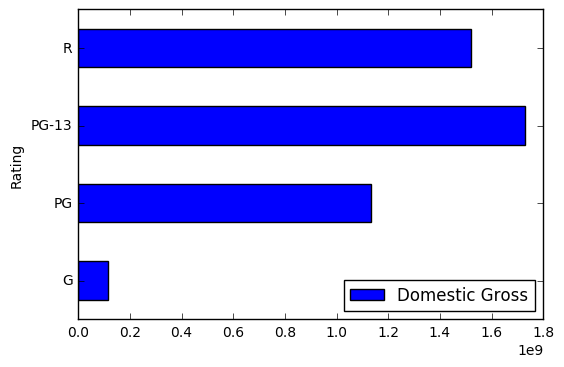

In [31]:
df.groupby('Rating')[['Domestic Gross']].sum().plot(kind='barh')

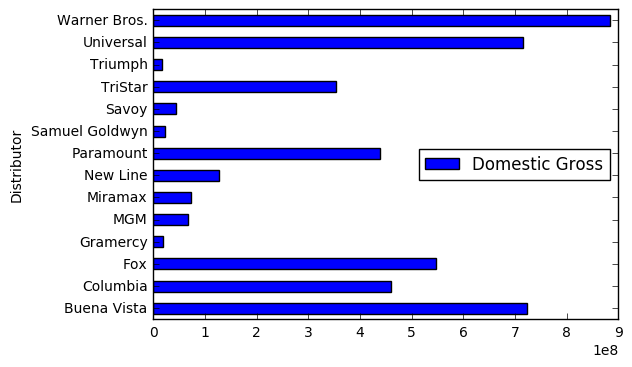

In [32]:
df.groupby('Distributor')[['Domestic Gross']].sum().plot(kind='barh')